In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
file1='/kaggle/input/datasetchat/chatGPT_DataSEt.xlsx'
df = pd.read_excel(file1)
#df=df.dropna(subset=['comments']).reset_index(drop=True)
print(df.tail())
comm = df['comments'].tolist()
newre = pd.DataFrame({
  'Comments':[],
  'neg':[],
  'neu':[],
  'pos':[],
  'compound':[],
  'sentiment':[]
                })

for sentence in comm:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(str(sentence))
    if(ss['compound']>0.05):
        sen='Positive'
    elif((ss['compound']<0.05) and (ss['compound']>-0.05)):
        sen='Neutral'
    else:
        sen='Negative'

    new_row = pd.DataFrame({
    'Comments':[str(sentence)],
    'neg':[ss['neg']],
    'neu':[ss['neu']],
    'pos':[ss['pos']],
    'compound':[ss['compound']],
    'sentiment':[sen],
                    })
    newre=pd.concat([newre,new_row],ignore_index=True)

df.drop('comments', inplace=True, axis=1)

result=df.join(newre)
print(result)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


                        date  likesCount    profileName  \
95  2023-06-30T15:17:42.000Z           1  Tejas Puranik   
96  2023-06-30T20:29:49.000Z           5     Pritha Roy   
97  2023-07-02T05:10:54.000Z           0  Abinas Kalita   
98  2023-07-01T06:39:20.000Z           1      Das Sayan   
99  2023-06-30T20:34:17.000Z           0  Nitin Chamate   

                                             comments  
95                                   Very informative  
96  You guyz are awesome giving so much informatio...  
97                                                NaN  
98               Very informative and awareness video  
99                                                NaN  
                        date  likesCount      profileName  \
0   2023-07-01T16:31:54.000Z           7  Hitendra Mistry   
1   2023-07-01T04:36:33.000Z           0      Katha Tomar   
2   2023-07-02T05:38:01.000Z           1  Mona Bhadauriya   
3   2023-07-02T21:48:13.000Z           0  Prakash Kothari   
4   

In [2]:
result.style\
.highlight_between(left=0.1,right=1.0,subset='neg',color='Red')\
.highlight_between(left=0.1,right=1.0,subset='neu',color='Orange')\
.highlight_between(left=0.1,right=1.0,subset='pos',color='LightBlue')

result.style\
.highlight_between(left=-1.0,right=-0.1,subset='compound',color='Red')\
.highlight_between(left=0.0,right=0.0,subset='compound',color='Orange')\
.highlight_between(left=0.1,right=1.0,subset='compound',color='LightBlue')

,date,likesCount,profileName,Comments,neg,neu,pos,compound,sentiment
0,2023-07-01T16:31:54.000Z,7,Hitendra Mistry,Excellent informative video. We need such campaign among people to make them quickly aware about forthcoming challenges due to AI.,0.000000,0.783000,0.217000,0.612400,Positive
1,2023-07-01T04:36:33.000Z,0,Katha Tomar,Useful information,0.000000,0.256000,0.744000,0.440400,Positive
2,2023-07-02T05:38:01.000Z,1,Mona Bhadauriya,Valuable information ❤️,0.000000,0.392000,0.608000,0.476700,Positive
3,2023-07-02T21:48:13.000Z,0,Prakash Kothari,Valuable information thankyou salute to you team for this great work,0.000000,0.530000,0.470000,0.839100,Positive
4,2023-07-02T11:20:09.000Z,0,Säýäñ Ðâs,Thank you sir for provide us this valuable information❤️,0.000000,0.533000,0.467000,0.729000,Positive
5,2023-07-01T20:08:13.000Z,0,Imran Hamid,Nice,0.000000,0.000000,1.000000,0.421500,Positive
6,2023-06-30T17:04:55.000Z,0,Haqa Haq Nawaz,Nice,0.000000,0.000000,1.000000,0.421500,Positive
7,2023-07-01T02:50:41.000Z,0,Harjinder Singh Uppal,very informative,0.000000,1.000000,0.000000,0.000000,Neutral
8,2023-07-01T18:22:41.000Z,0,Gayatri Borpatra Gohain,Very informative video,0.000000,1.000000,0.000000,0.000000,Neutral
9,2023-07-02T18:29:16.000Z,0,Manjula D Majumdar,Brilliant analysis!,0.000000,0.196000,0.804000,0.623900,Positive


In [3]:
stop_words = stopwords.words()


def cleaning(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     

    # removing the emojies              
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    return text




  

          Word  Frequency
0  informative         27
1        video         23
2  information         21
3     valuable          9
4        great          9
5         nice          9
6         work          6
7         guys          6
8      sharing          5
9    excellent          4


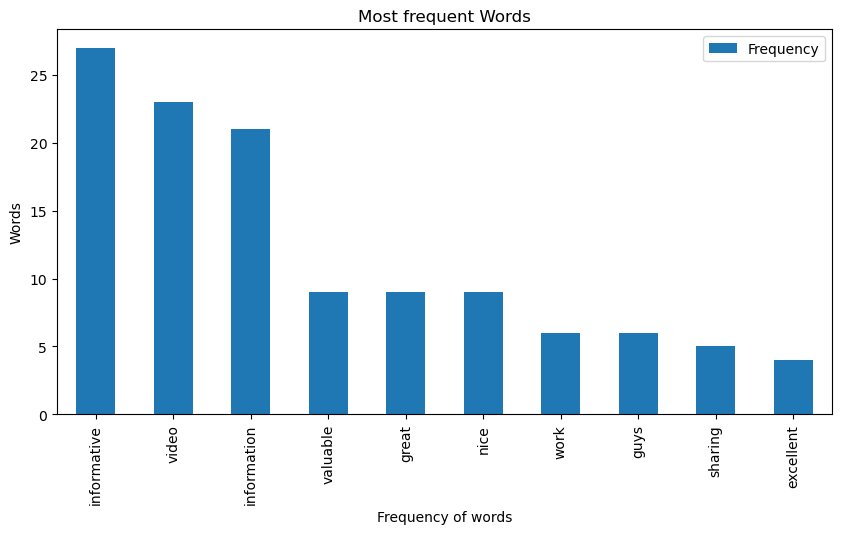

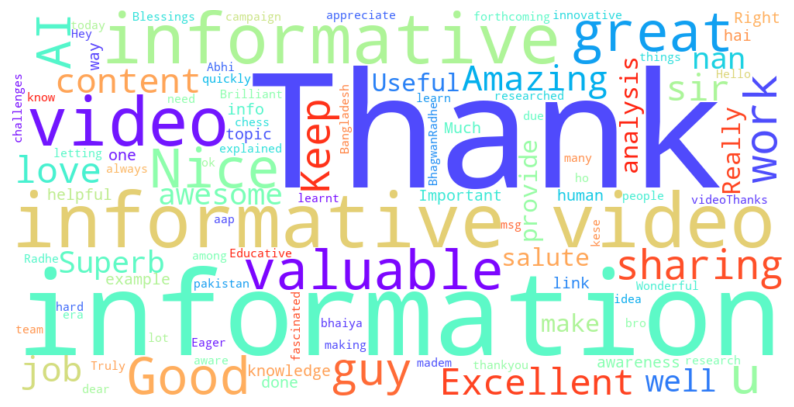

In [4]:
dt = result['Comments'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

rslt.plot(kind='bar', title='Most frequent Words', y='Frequency',
          xlabel='Frequency of words',ylabel='Words',
         x='Word', figsize=(10,5))


post_text = ' '.join(result['Comments'])
post_text = post_text.replace('\n', '') # remove blank lines characters
wordcloud = WordCloud(random_state=1,
                      width=1000,
                      height=500,
                      collocations=True, 
                      max_words=100,
                      background_color='white',
                      colormap ='rainbow',
                      contour_color='steelblue').generate(post_text)

 # Function to display word cloud img via matplotlib
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
  
plot_cloud(wordcloud)





Most Negative Comment with Sentiment Score  -0.296 is : 

 You are Right..if possible we have to stop it..


Most Positive Comment with Sentiment Score  0.9274  is : 
 
 You guyz are awesome giving so much information in a short video. Keep up the good work. Following Love
Size of x_train: (80, 513)
Size of y_train: (80,)
Size of x_test: (20, 513)
Size of y_test: (20,)


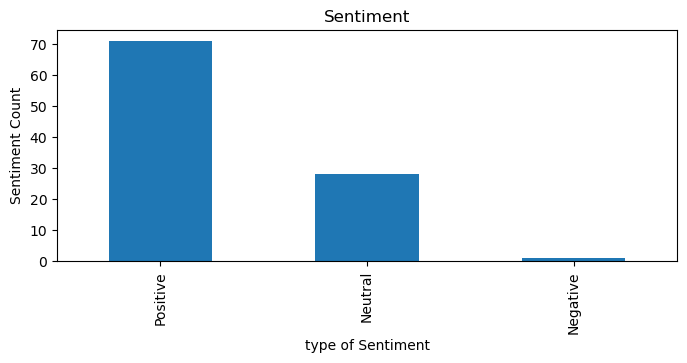

In [5]:
maxi=result['compound'].max()
mini=result['compound'].min()
like=result['likesCount'].max()
for i,row in result.iterrows():
    if(result['compound'][i]==mini):
        print("\n\nMost Negative Comment with Sentiment Score ",
              mini,"is : \n\n",result['Comments'][i])
        
for i,row in result.iterrows():
    if(result['compound'][i]==maxi):
        print("\n\nMost Positive Comment with Sentiment Score ",
              maxi," is : \n \n",result['Comments'][i])



count=result['sentiment'].value_counts()
count.plot(kind='bar', title='Sentiment', ylabel='Sentiment Count',
         xlabel='type of Sentiment', figsize=(8,3))



vect = CountVectorizer(ngram_range=(1,2)).fit(result['Comments'])
X = result['Comments']
Y = result['sentiment']
X = vect.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

In [6]:
import warnings
warnings.filterwarnings('ignore')


logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

Test accuracy: 70.00%
[[ 3  3]
 [ 3 11]]


              precision    recall  f1-score   support

     Neutral       0.50      0.50      0.50         6
    Positive       0.79      0.79      0.79        14

    accuracy                           0.70        20
   macro avg       0.64      0.64      0.64        20
weighted avg       0.70      0.70      0.70        20

